In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import emoji
import jaconv

In [2]:
cd ../

C:\Users\akite\OneDrive\デスクトップ\source code\twitter-compe


In [3]:
df = pd.read_csv('./arranged_data/add_all_flg.csv')

In [4]:
df["text_length"] = np.zeros(df.shape[0])
for idx in range(df.shape[0]):
    df["text_length"].loc[idx] = len(df["text"].loc[idx])

c:\users\akite\onedrive\デスクトップ\source code\twitter-compe\venv\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
df

,Unnamed: 0,Unnamed: 0.1,id,flg,keyword,location,text,is_url,is_location,num_emoji,num_reply,num_hash,text_length
0,0,0,20587,0,覚醒剤,icon:大トロ(@sato_wall_aim ),【マイリスト】カカカカ覚醒剤 https://t.co/15ZY9Oa2QS #sm3630...,True,False,0.0,0,1,50.0
1,1,1,31857,0,雷 落雷,ジャングル,@kenjikenji3343 せやな 落雷撃たれたら全員張り付くしかなかったからなぁ なん...,False,False,0.0,1,0,59.0
2,2,2,36793,0,血液,↓↓↓↓↓こちらをクリック↓↓↓↓,【カフェインの力】 体を動かす前にカフェインを摂ると交感神経が刺激され、体内の脂肪が分解され...,False,False,0.0,0,0,139.0
3,3,3,42299,0,ハリケーン,Close to your heart,あなたの鼓膜に直に響かせたい ハリケーンのように激しく愛したい 余計な壁なんて取っ払って 奥...,False,False,0.0,0,0,119.0
4,4,4,51449,0,殺人鬼,偽物なので悪しからず,@Mr8yt 違う違う。お化けは現実にいないけど殺人鬼は現実にいるじゃん〜。うーん、ホラーっ...,False,False,0.0,1,0,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20280,20280,20280,45367,0,爆発した,NaN,@front_0v0 まだ爆発したかはわかりません。 一つだけ言えることは、もうすぐ（数万年...,False,True,0.0,1,0,101.0
20281,20281,20281,45546,0,爆発した,🐒🐟 ✩͓̊ 🌊🐷,@w_khtoO ぴこち愛爆発した 。 ぴこちぴこちぴこちいいいいいい 愛してる❤︎,False,False,1.0,1,0,42.0
20282,20282,20282,31532,0,爆発,Japan,今のローテ環境、重要度で言うと 序盤からテンポを取る動き＜進化t以降に爆発的な動き だってこ...,False,False,0.0,0,0,138.0
20283,20283,20283,21619,0,緊急 緊急事態,NaN,@kharaguchi 代議士先生 これは一般国民の意見が耳障りだから と言う理由での恫喝...,False,True,0.0,1,0,102.0


In [6]:
#urlの削除
df = df.replace(r'(https?://[\w/:%#\$&\?\(\)~\.=\+\-]+)',"",regex=True)
#replyの削除
df = df.replace(r'@([A-Za-z0-9_])+',"",regex = True)
#全角スペースを汎化すスペースに
df["text"] = jaconv.z2h(df["text"].str,digit=True, ascii = True) 

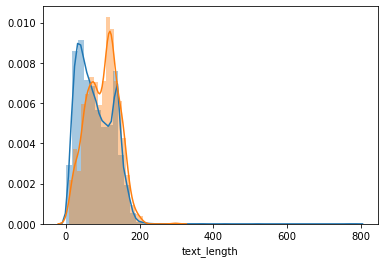

In [7]:
sns.distplot(df[df["flg"]==0]["text_length"])
sns.distplot(df[df["flg"]==1]["text_length"])

In [8]:
df["text_wakati"] = df["text"].str.split(",")

In [10]:
#分かち書き
from janome.tokenizer import Tokenizer
t= Tokenizer()

for idx in range(0,df.shape[0]):
    df["text_wakati"].loc[idx] = [token.base_form for token in t.tokenize(df["text"].loc[idx])]


c:\users\akite\onedrive\デスクトップ\source code\twitter-compe\venv\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
df.to_csv("./arranged_data/wakati.csv")